In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Noto Sans CJK JP'  # 替换为你选择的字体
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns
from sklearn.model_selection import train_test_split

import metrics
import gender_data
import naive_bayes

In [2]:
folder_path = 'genderdata'
all_data = pd.DataFrame()
all_data = gender_data.read_data_from(folder_path)
# all_data.to_csv('alldata.csv', index=False)
# all_data

In [3]:
# # 可视化数据
# gender_data.plot_histogram(data=all_data)
# gender_data.plot_histogram(data=all_data, color_by='性别')
# gender_data.plot_histogram(data=all_data, color_by='年份')

In [4]:
# # 可视化数据
# fig, axs = plt.subplots(2, 3, figsize=(14, 7))

# sns.kdeplot(all_data['身高(cm)'], fill=True, color="b", ax=axs[0, 0])
# sns.kdeplot(all_data['体重(kg)'], fill=True, color="b", ax=axs[0, 1])
# sns.kdeplot(all_data['尺码'], fill=True, color="b", ax=axs[0, 2])
# sns.histplot( x=all_data["身高(cm)"], kde=True, ax=axs[1, 0])
# sns.histplot( x=all_data["体重(kg)"], kde=True, ax=axs[1, 1])
# sns.histplot( x=all_data["尺码"], kde=True, ax=axs[1, 2])

# plt.show()

In [5]:
# # 检验数据是否符合正态分布
# from statsmodels.graphics.gofplots import qqplot
# #q-q plot:
# fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# qqplot(all_data['身高(cm)'], line='s', ax=axs[0])
# qqplot(all_data['体重(kg)'], line='s', ax=axs[1])
# qqplot(all_data['尺码'], line='s', ax=axs[2])
# plt.show()

# 1. 单个特征进行实验
$$\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}$$

根据身高(cm)预测的性能分析如下
准确率为: 0.8742857142857143
混淆矩阵为:
[[ 53   8]
 [ 14 100]]
分类报告为:
              precision    recall  f1-score   support

           女       0.79      0.87      0.83        61
           男       0.93      0.88      0.90       114

    accuracy                           0.87       175
   macro avg       0.86      0.87      0.86       175
weighted avg       0.88      0.87      0.88       175

ROC曲线下面积为: 0.8856773080241587
-------------------------------------------------------------------------------
根据体重(kg)预测的性能分析如下
准确率为: 0.76
混淆矩阵为:
[[50 11]
 [31 83]]
分类报告为:
              precision    recall  f1-score   support

           女       0.62      0.82      0.70        61
           男       0.88      0.73      0.80       114

    accuracy                           0.76       175
   macro avg       0.75      0.77      0.75       175
weighted avg       0.79      0.76      0.77       175

ROC曲线下面积为: 0.7892579810181191
----------------------------------------------------------------

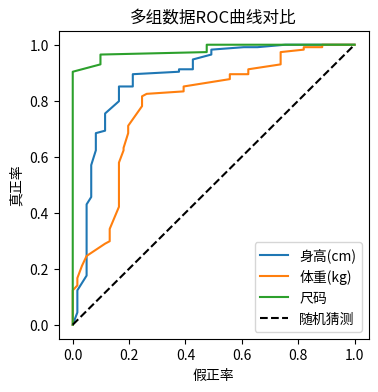

-------------------------------------------------------------------------------
>>>>> 理想先验概率为: 0.68 vs. 0.32 <<<<<
先验概率为: 0.10 vs. 0.90
根据身高(cm)预测的性能分析如下
准确率为: 0.7542857142857143
-------------------------------------------------------------------------------
先验概率为: 0.25 vs. 0.75
根据身高(cm)预测的性能分析如下
准确率为: 0.84
-------------------------------------------------------------------------------
先验概率为: 0.50 vs. 0.50
根据身高(cm)预测的性能分析如下
准确率为: 0.8742857142857143
-------------------------------------------------------------------------------
先验概率为: 0.75 vs. 0.25
根据身高(cm)预测的性能分析如下
准确率为: 0.8914285714285715
-------------------------------------------------------------------------------
先验概率为: 0.90 vs. 0.10
根据身高(cm)预测的性能分析如下
准确率为: 0.8228571428571428
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------


In [6]:
# 数据集划分
features=['身高(cm)', '体重(kg)', '尺码']
target='性别'
# X = all_data[features]
# y = all_data[target]
train_data, test_data = train_test_split(all_data, test_size=0.2, random_state=42)
metrics_array = []
labels_list = []
for feature in features:
   # 在测试集上应用分类器
   predictions_by_feature = naive_bayes.bayes_classifier_by(train_data, test_data,feature=feature, prior_prob_male=0.5)
   predictions_prob = naive_bayes.bayes_classifier_by_with_prob(train_data, test_data,feature=feature, prior_prob_male=0.5)
   print("根据{}预测的性能分析如下".format(feature))
   metrics_data = metrics.get_metrics(test_data['性别'], predictions_by_feature, predictions_prob)
   metrics_array.append(metrics_data)
   # 对应的标签
   labels_list.append(feature) 
# 将多组数据的ROC曲线放在一张图里做可视化对比
metrics.plot_roc_curves(metrics_array, labels_list)
print("-------------------------------------------------------------------------------")
feature = '身高(cm)'
metrics_array = []
labels_list = []
print('>>>>> 理想先验概率为: {:.2f} vs. {:.2f} <<<<<'.format( train_data['性别'].value_counts(normalize=True).iloc[0],
                                                            train_data['性别'].value_counts(normalize=True).iloc[1]))
for prior_prob_male in [0.1, 0.25, 0.5, 0.75, 0.9]:
   print('先验概率为: {:.2f} vs. {:.2f}'.format(prior_prob_male,1-prior_prob_male))
   predictions_by_feature = naive_bayes.bayes_classifier_by(train_data, test_data,feature=feature, prior_prob_male=prior_prob_male)
   predictions_prob = naive_bayes.bayes_classifier_by_with_prob(train_data, test_data,feature=feature, prior_prob_male=prior_prob_male)
   print("根据{}预测的性能分析如下".format(feature))
   metrics.get_metrics_accuracy(test_data['性别'], predictions_by_feature, predictions_prob)
#    metrics_data = metrics.get_metrics(test_data['性别'], predictions_by_feature, predictions_prob)
#    metrics_array.append(metrics_data)
#    # 对应的标签
#    labels_list.append(prior_prob_male) 
# # 将多组数据的ROC曲线放在一张图里做可视化对比
# metrics.plot_roc_curves(metrics_array, labels_list)
print("-------------------------------------------------------------------------------")

# 2. 同时采用身高和体重数据作为特征(最小错误率)

准确率为: 0.8742857142857143
混淆矩阵为:
[[ 51  10]
 [ 12 102]]
分类报告为:
              precision    recall  f1-score   support

           女       0.81      0.84      0.82        61
           男       0.91      0.89      0.90       114

    accuracy                           0.87       175
   macro avg       0.86      0.87      0.86       175
weighted avg       0.88      0.87      0.87       175

ROC曲线下面积为: 0.939531205061835
-------------------------------------------------------------------------------


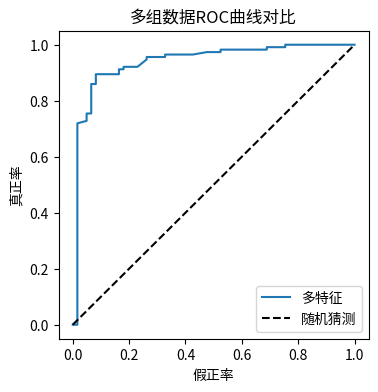

-------------------------------------------------------------------------------
>>>>> 理想先验概率为: 0.68 vs. 0.32 <<<<<
先验概率为: 0.10 vs. 0.90
准确率为: 0.8057142857142857
-------------------------------------------------------------------------------
先验概率为: 0.25 vs. 0.75
准确率为: 0.8514285714285714
-------------------------------------------------------------------------------
先验概率为: 0.50 vs. 0.50
准确率为: 0.9028571428571428
-------------------------------------------------------------------------------
先验概率为: 0.75 vs. 0.25
准确率为: 0.88
-------------------------------------------------------------------------------
先验概率为: 0.90 vs. 0.10
准确率为: 0.8571428571428571
-------------------------------------------------------------------------------


In [7]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(all_data[['身高(cm)', '体重(kg)']], 
                                                    all_data['性别'], 
                                                    test_size=0.2, 
                                                    random_state=42)
# 使用自定义的高斯朴素贝叶斯模型
model = naive_bayes.MyGaussianNB()
model.fit(X_train.to_numpy(), y_train.to_numpy())
# 预测
y_pred = model.predict(X_test.to_numpy())
predictions_prob = model.predict_proba(X_test.to_numpy())[:, 1]
# 评估性能
metrics_data = metrics.get_metrics(y_test, y_pred, predictions_prob)
metrics_array = []
labels_list = []
metrics_array.append(metrics_data)
# 对应的标签
labels_list.append('多特征') 
metrics.plot_roc_curves(metrics_array, labels_list)


# # 与sklearn的高斯朴素贝叶斯模型做对比
# from sklearn.naive_bayes import GaussianNB
# model = GaussianNB()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# predictions_prob = model.predict_proba(X_test)[:, 1]
# metrics.get_metrics(y_test, y_pred, predictions_prob)

print("-------------------------------------------------------------------------------")
print('>>>>> 理想先验概率为: {:.2f} vs. {:.2f} <<<<<'.format( y_train.value_counts(normalize=True).iloc[0],
                                                            y_train.value_counts(normalize=True).iloc[1]))
for prior_prob in [0.1, 0.25, 0.5, 0.75, 0.9]:
   print('先验概率为: {:.2f} vs. {:.2f}'.format(prior_prob,1-prior_prob))
   model = naive_bayes.MyGaussianNB()
   model.fit(X_train.to_numpy(), y_train.to_numpy(),prior_prob)
   # 预测
   y_pred = model.predict(X_test.to_numpy())
   predictions_prob = model.predict_proba(X_test.to_numpy())[:, 1]
   metrics.get_metrics_accuracy(y_test, y_pred, predictions_prob)

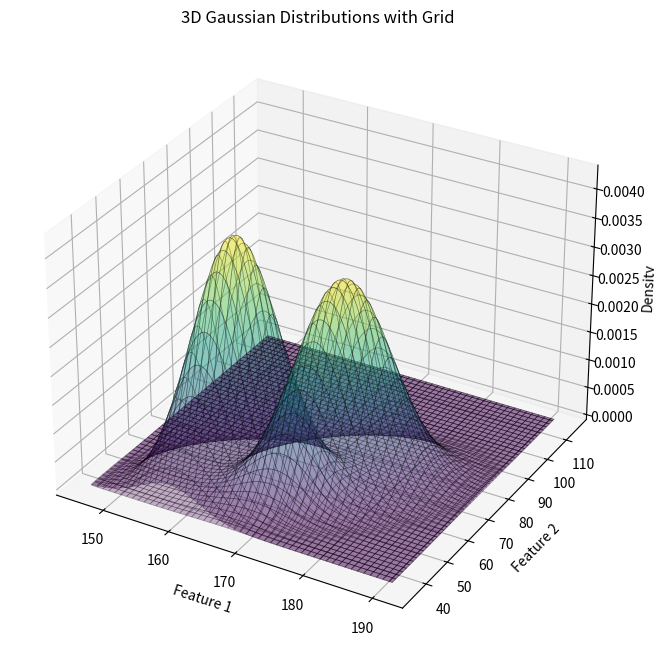

In [8]:
# # 可视化决策边界
# X_train, X_test, y_train, y_test = train_test_split(all_data[['身高(cm)', '体重(kg)']], 
#                                                     all_data['gender'], 
#                                                     test_size=0.2, 
#                                                     random_state=42)
# # 使用自定义的高斯朴素贝叶斯模型
# model = naive_bayes.MyGaussianNB()
# model.fit(X_train.to_numpy(), y_train.to_numpy())
# model.plot_decision_boundary(X_train.values, y_train.values)

X_train, X_test, y_train, y_test = train_test_split(all_data[['身高(cm)', '体重(kg)']], 
                                                    all_data['gender'], 
                                                    test_size=0.2, 
                                                    random_state=42)
# 使用自定义的高斯朴素贝叶斯模型
model = naive_bayes.MyGaussianNB()
model.fit(X_train.to_numpy(), y_train.to_numpy())
model.plot_3d_gaussian_grid(X_train.values, y_train.values)

# 3. Parzen窗法
$$\text{{kernel\_sum}} = \frac{1}{n} \sum_{i=1}^{n} \frac{e^{-\frac{(x - x_i)^2}{2h^2}}}{\sqrt{2\pi}h}$$

窗宽取1.0时，根据身高预测的性能分析如下
准确率为: 0.88
混淆矩阵为:
[[55  6]
 [15 99]]
分类报告为:
              precision    recall  f1-score   support

           女       0.79      0.90      0.84        61
           男       0.94      0.87      0.90       114

    accuracy                           0.88       175
   macro avg       0.86      0.89      0.87       175
weighted avg       0.89      0.88      0.88       175

ROC曲线下面积为: 0.8918607995398332
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
窗宽取5.0时，根据身高预测的性能分析如下
准确率为: 0.8742857142857143
混淆矩阵为:
[[ 53   8]
 [ 14 100]]
分类报告为:
              precision    recall  f1-score   support

           女       0.79      0.87      0.83        61
           男       0.93      0.88      0.90       114

    accuracy                           0.87       175
   macro avg       0.86      0.87      0.86       175
weighted avg       0.88      0.87      0.88       175

ROC曲线下

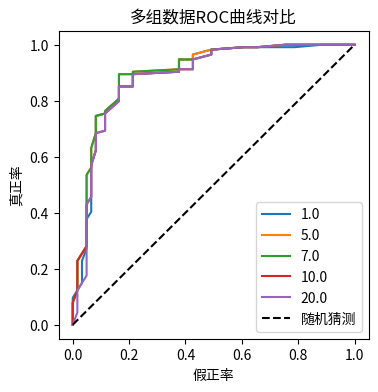

In [9]:
train_data, test_data = train_test_split(all_data, test_size=0.2, random_state=42)
# 在测试集上应用分类器
metrics_array = []
labels_list = []
for h in [1.0, 5.0, 7.0, 10.0, 20.0]:
    predictions_parzen_height = naive_bayes.bayes_classifier_parzen_height(train_data, test_data, h)
    predictions_prob_male, predictions_prob_female = naive_bayes.bayes_classifier_parzen_height_with_prob(train_data, test_data, h)
    print("窗宽取{}时，根据身高预测的性能分析如下".format(h))
    metrics_data = metrics.get_metrics(test_data['性别'], predictions_parzen_height, predictions_prob_male)
    metrics_array.append(metrics_data)
    labels_list.append(h)
    print("-------------------------------------------------------------------------------")
metrics.plot_roc_curves(metrics_array, labels_list)